In [2]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os, random
import cv2
from glob import glob
import sklearn
from sklearn.model_selection import train_test_split
import tensorflow as tf
from sklearn.metrics import accuracy_score, classification_report
from pathlib import Path
from PIL import Image, ImageDraw, ImageFont

In [3]:
data = os.listdir("digits/Digits")
train_X = []
test_X = []
train_y = []
test_y = []
valid_X = []
valid_y = []
data_classes = len(data)

for i in range(data_classes):
    data_X = []
    data_y = []
    data_list = os.listdir("digits/Digits" + "/" + str(i))
    for j in data_list:
        pic = cv2.imread("digits/Digits" + "/" + str(i) + "/" + j)
        pic = cv2.resize(pic, (32, 32))
        data_X.append(pic)
        data_y.append(i)
    
    train_X_i, test_X_i, train_y_i, test_y_i = train_test_split(data_X, data_y, test_size=0.05, random_state=42)
    train_X_i, valid_X_i, train_y_i, valid_y_i = train_test_split(train_X_i, train_y_i, test_size=0.2, random_state=42)
    
    train_X.extend(train_X_i)
    test_X.extend(test_X_i)
    train_y.extend(train_y_i)
    test_y.extend(test_y_i)
    valid_X.extend(valid_X_i)
    valid_y.extend(valid_y_i)

# Convert lists to numpy arrays
train_X = np.array(train_X)
test_X = np.array(test_X)
train_y = np.array(train_y)
test_y = np.array(test_y)
valid_X = np.array(valid_X)
valid_y = np.array(valid_y)

In [4]:
print("Training Set Shape = ",train_X.shape)
print("Validation Set Shape = ",valid_X.shape)
print("Test Set Shape = ",test_X.shape)

Training Set Shape =  (7686, 32, 32, 3)
Validation Set Shape =  (1922, 32, 32, 3)
Test Set Shape =  (508, 32, 32, 3)


In [5]:
def Prep(img):
    img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY) #making image grayscale
    img = cv2.equalizeHist(img) #Histogram equalization to enhance contrast
    img = img/255 #normalizing
    return img
train_X = np.array(list(map(Prep, train_X)))
test_X = np.array(list(map(Prep, test_X)))
valid_X= np.array(list(map(Prep, valid_X)))
#Reshaping the images
train_X = train_X.reshape(train_X.shape[0], train_X.shape[1], train_X.shape[2],1)
test_X = test_X.reshape(test_X.shape[0], test_X.shape[1], test_X.shape[2],1)
valid_X = valid_X.reshape(valid_X.shape[0], valid_X.shape[1], valid_X.shape[2],1)
#Augmentation
datagen = tf.keras.preprocessing.image.ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, zoom_range=0.2, shear_range=0.1, rotation_range=10)
datagen.fit(train_X)

In [6]:
train_y = tf.keras.utils.to_categorical(train_y, data_classes)
test_y = tf.keras.utils.to_categorical(test_y, data_classes)
valid_y = tf.keras.utils.to_categorical(valid_y, data_classes)

In [7]:
# Creating a Neural Network
model = tf.keras.models.Sequential()
model.add((tf.keras.layers.Conv2D(60,(5,5),input_shape=(32, 32, 1) ,padding = 'Same' ,activation='relu')))
model.add((tf.keras.layers.Conv2D(60, (5,5),padding="same",activation='relu')))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))
#model.add(Dropout(0.25))
model.add((tf.keras.layers.Conv2D(30, (3,3),padding="same", activation='relu')))
model.add((tf.keras.layers.Conv2D(30, (3,3), padding="same", activation='relu')))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(500,activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(10, activation='softmax'))
model.summary()

c:\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 60)     │         1,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 32, 32, 60)     │        90,060 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 60)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 16, 16, 30)     │        16,230 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 16, 16, 30)     │         8,130 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 8, 8, 30)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 8, 8, 30)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1920)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 500)            │       960,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 500)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         5,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,081,490 (4.13 MB)

 Trainable params: 1,081,490 (4.13 MB)

 Non-trainable params: 0 (0.00 B)

In [8]:
# Compiling the model
optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.001, rho=0.9, epsilon=1e-08, decay=0.0)
model.compile(optimizer=optimizer,loss='categorical_crossentropy',metrics=['accuracy'])
#Fit the model
history = model.fit(datagen.flow(train_X, train_y, batch_size=32),
                              epochs = 30, validation_data = (valid_X, valid_y),
                              verbose = 2, steps_per_epoch= 200)

# Testing the model on the test set
score = model.evaluate(test_X, test_y, verbose=0)
print('Test Score = ',score[0])
print('Test Accuracy =', score[1])

Epoch 1/30


c:\Python312\Lib\site-packages\keras\src\optimizers\base_optimizer.py:33: UserWarning: Argument `decay` is no longer supported and will be ignored.
  warnings.warn(
c:\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


200/200 - 30s - 150ms/step - accuracy: 0.6420 - loss: 1.0259 - val_accuracy: 0.9620 - val_loss: 0.1179
Epoch 2/30


c:\Python312\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


200/200 - 8s - 39ms/step - accuracy: 0.8963 - loss: 0.3322 - val_accuracy: 0.9688 - val_loss: 0.0989
Epoch 3/30
200/200 - 28s - 142ms/step - accuracy: 0.9209 - loss: 0.2489 - val_accuracy: 0.9792 - val_loss: 0.0730
Epoch 4/30
200/200 - 8s - 39ms/step - accuracy: 0.9474 - loss: 0.1676 - val_accuracy: 0.9740 - val_loss: 0.0668
Epoch 5/30
200/200 - 28s - 139ms/step - accuracy: 0.9452 - loss: 0.1716 - val_accuracy: 0.9865 - val_loss: 0.0397
Epoch 6/30
200/200 - 8s - 39ms/step - accuracy: 0.9580 - loss: 0.1279 - val_accuracy: 0.9818 - val_loss: 0.0426
Epoch 7/30
200/200 - 28s - 139ms/step - accuracy: 0.9592 - loss: 0.1308 - val_accuracy: 0.9912 - val_loss: 0.0293
Epoch 8/30
200/200 - 8s - 39ms/step - accuracy: 0.9604 - loss: 0.1209 - val_accuracy: 0.9896 - val_loss: 0.0287
Epoch 9/30
200/200 - 28s - 140ms/step - accuracy: 0.9669 - loss: 0.1083 - val_accuracy: 0.9906 - val_loss: 0.0269
Epoch 10/30
200/200 - 8s - 38ms/step - accuracy: 0.9689 - loss: 0.1108 - val_accuracy: 0.9917 - val_loss: 0

_225_4271131.jpeg


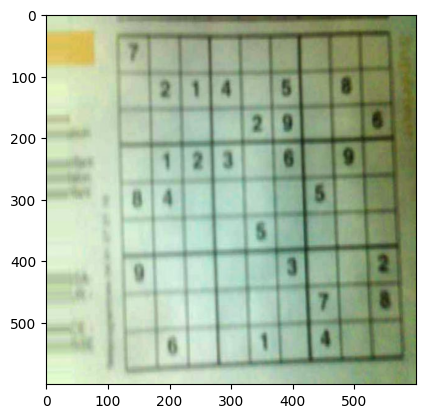

In [25]:
# Randomly select an image from the dataset 
folder="aug"
a=random.choice(os.listdir(folder))
print(a)
sudoku_a = cv2.imread(folder+'/'+a)
plt.figure()
plt.imshow(sudoku_a)
plt.show()

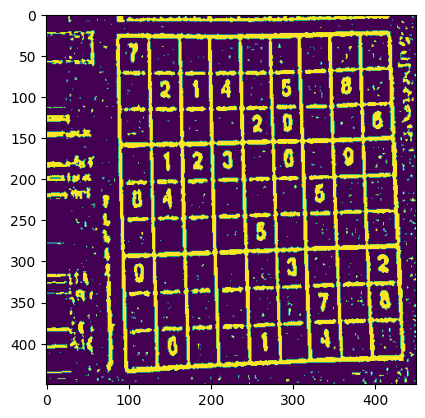

In [26]:
#Preprocessing image to be read
sudoku_a = cv2.resize(sudoku_a, (450,450))
# function to greyscale, blur and change the receptive threshold of image
def preprocess(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) 
    blur = cv2.GaussianBlur(gray, (3,3),6) 
    #blur = cv2.bilateralFilter(gray,9,75,75)
    threshold_img = cv2.adaptiveThreshold(blur,255,1,1,11,2)
    return threshold_img

threshold = preprocess(sudoku_a)
#let's look at what we have got
plt.figure()
plt.imshow(threshold)
plt.show()

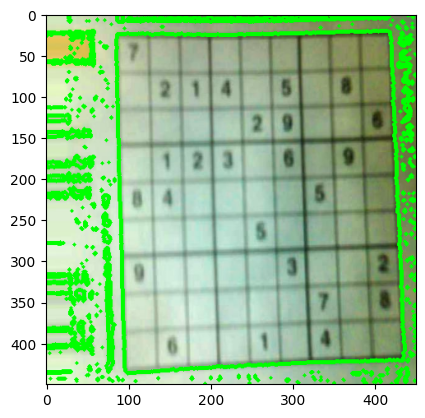

In [27]:
# Finding the outline of the sudoku puzzle in the image
contour_1 = sudoku_a.copy()
contour_2 = sudoku_a.copy()
contour, hierarchy = cv2.findContours(threshold,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
cv2.drawContours(contour_1, contour,-1,(0,255,0),3)
#let's see what we got
plt.figure()
plt.imshow(contour_1)
plt.show()

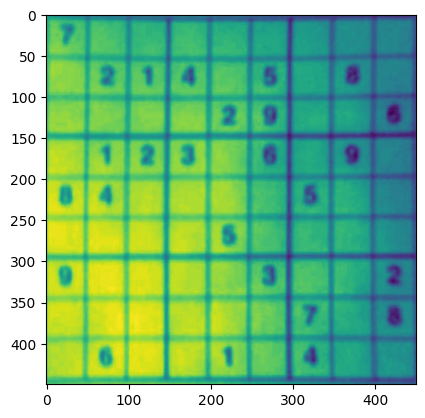

In [29]:
def main_outline(contour):
    biggest = np.array([])
    max_area = 0
    for i in contour:
        area = cv2.contourArea(i)
        if area > 50:
            peri = cv2.arcLength(i, True)
            approx = cv2.approxPolyDP(i , 0.02* peri, True)
            if area > max_area and len(approx) == 4:
                biggest = approx
                max_area = area

    return biggest, max_area

def reframe(points):
    points = points.reshape((4, 2))
    points_new = np.zeros((4,1,2),dtype = np.int32)
    add = points.sum(1)
    points_new[0] = points[np.argmin(add)]
    points_new[3] = points[np.argmax(add)]
    diff = np.diff(points, axis =1)
    points_new[1] = points[np.argmin(diff)]
    points_new[2] = points[np.argmax(diff)]
    return points_new

def splitcells(img):
    rows = np.vsplit(img,9)
    boxes = []
    for r in rows:
        cols = np.hsplit(r,9)
        for box in cols:
            boxes.append(box)
    return boxes

black_img = np.zeros((90,90,3), np.uint8)
biggest, maxArea = main_outline(contour)
if biggest.size != 0:
    biggest = reframe(biggest)
cv2.drawContours(contour_2,biggest,-1, (0,255,0),10)
pts1 = np.float32(biggest)
pts2 = np.float32([[0,0],[450,0],[0,450],[450,450]])
matrix = cv2.getPerspectiveTransform(pts1, pts2)
imagewrap = cv2.warpPerspective(sudoku_a,matrix,(450,450))
imagewrap =cv2.cvtColor(imagewrap, cv2.COLOR_BGR2GRAY)
cv2.imwrite('sudoku.jpg', imagewrap)
plt.figure()
plt.imshow(imagewrap)
plt.show()

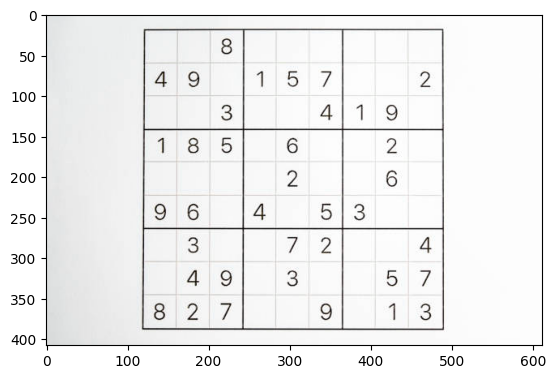

In [13]:
# Importing puzzle to be solved
puzzle = cv2.imread("input_sudoku.jpg")

plt.figure()
plt.imshow(puzzle)
plt.show()

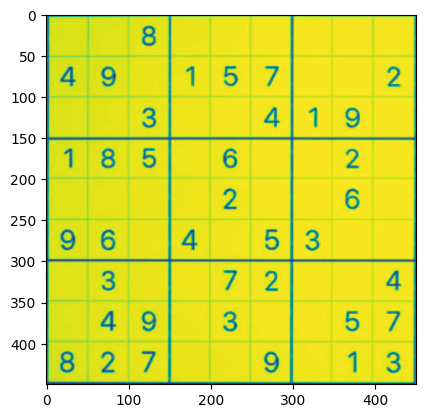

In [14]:
# Resizing puzzle to be solved
puzzle = cv2.resize(puzzle, (450,450))
# Preprocessing Puzzle 
su_puzzle = preprocess(puzzle)

# Finding the outline of the sudoku puzzle in the image
su_contour_1= su_puzzle.copy()
su_contour_2= sudoku_a.copy()
su_contour, hierarchy = cv2.findContours(su_puzzle,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
cv2.drawContours(su_contour_1, su_contour,-1,(0,255,0),3)

black_img = np.zeros((450,450,3), np.uint8)
su_biggest, su_maxArea = main_outline(su_contour)
if su_biggest.size != 0:
    su_biggest = reframe(su_biggest)
    cv2.drawContours(su_contour_2,su_biggest,-1, (0,255,0),10)
    su_pts1 = np.float32(su_biggest)
    su_pts2 = np.float32([[0,0],[450,0],[0,450],[450,450]])
    su_matrix = cv2.getPerspectiveTransform(su_pts1,su_pts2)  
    su_imagewrap = cv2.warpPerspective(puzzle,su_matrix,(450,450))
    su_imagewrap =cv2.cvtColor(su_imagewrap, cv2.COLOR_BGR2GRAY)
    
plt.figure()
plt.imshow(su_imagewrap)
plt.show()

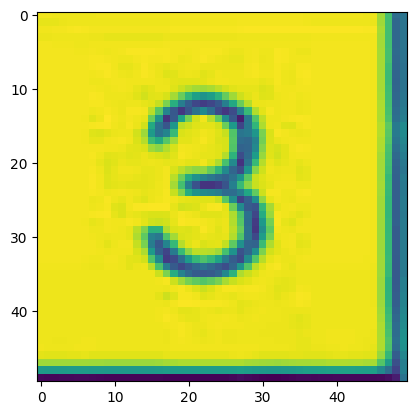

In [15]:
sudoku_cell = splitcells(su_imagewrap)
#Let's have alook at the last cell
plt.figure()
plt.imshow(sudoku_cell[80])
plt.show()

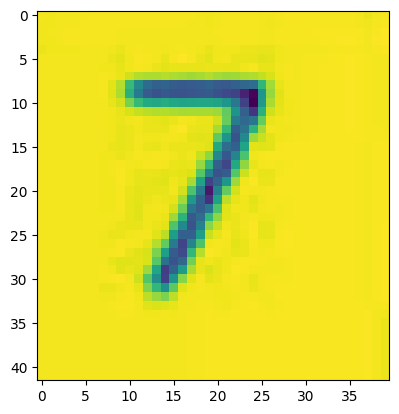

In [16]:
def CropCell(cells):
    Cells_croped = []
    for image in cells:
        img = np.array(image)
        img = img[4:46, 6:46]
        img = Image.fromarray(img)
        img = np.array(img)
        Cells_croped.append(img)
    return Cells_croped

sudoku_cell_croped= CropCell(sudoku_cell)
#Let's have alook at the last cell
plt.figure()
plt.imshow(sudoku_cell_croped[58])
plt.show()

In [17]:
def read_cells(cell, model):
    result = []
    for image in cell:
        # Preprocess the image as it was in the model
        img = np.asarray(image)
        img = img[4:img.shape[0] - 4, 4:img.shape[1] - 4]
        img = cv2.resize(img, (32, 32))
        img = img / 255.0
        img = img.reshape(1, 32, 32, 1)
        
        # Getting predictions and setting the values if probabilities are above 65%
        predictions = model.predict(img)
        classIndex = np.argmax(predictions, axis=1)[0]  # Get the class index with the highest probability
        probabilityValue = np.max(predictions)  # Get the highest probability value
        
        if probabilityValue > 0.65:
            result.append(classIndex)
        else:
            result.append(0)
    return result

# Use the function
grid = read_cells(sudoku_cell_croped, model)
grid = np.asarray(grid)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 257ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━

In [18]:
grid = np.reshape(grid, (9, 9))
grid

array([[0, 0, 8, 0, 0, 0, 0, 0, 0],
       [4, 9, 0, 0, 5, 7, 0, 0, 2],
       [0, 0, 3, 0, 0, 4, 1, 9, 0],
       [1, 8, 5, 0, 6, 0, 0, 2, 0],
       [0, 0, 0, 0, 2, 0, 0, 6, 0],
       [9, 6, 0, 4, 0, 5, 3, 0, 0],
       [0, 3, 0, 0, 7, 2, 0, 0, 4],
       [0, 4, 9, 0, 3, 0, 0, 5, 7],
       [8, 2, 7, 0, 0, 9, 0, 1, 3]], dtype=int64)

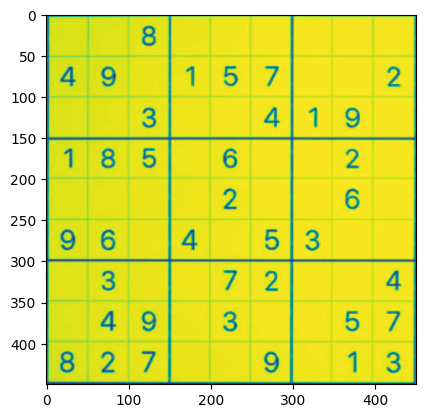

In [19]:
#For compairing 
plt.figure()
plt.imshow(su_imagewrap)
plt.show()

In [20]:
def solve_sudoku(board):
    def solve(board):
        for i in range(len(board)):
            for j in range(len(board[0])):
                if board[i][j] == 0:
                    for num in range(1, 10):
                        if is_valid(num, board, i, j):
                            board[i][j] = num
                            if solve(board):
                                return True
                            else:
                                board[i][j] = 0
                    return False
        return True

    def is_valid(num, board, row, col):
        for i in range(9):
            if board[i][col] == num:
                return False
            if board[row][i] == num:
                return False
            if board[3 * (row // 3) + (i // 3)][3 * (col // 3) + (i % 3)] == num:
                return False
        return True
    
    solve(board)
    return board

In [21]:
solved_grid = solve_sudoku(grid)

In [22]:
def sudoku_to_image(grid, image_path="sudoku.png"):
    # Define image size and create a blank white image
    img_size = 450  # 450x450 pixels
    cell_size = img_size // 9
    img = Image.new('RGB', (img_size, img_size), color=(255, 255, 255))
    draw = ImageDraw.Draw(img)

    # Load a font
    font = ImageFont.truetype("arial.ttf", size=24)

    # Draw the grid
    for i in range(10):
        # Thicker lines for 3x3 grid boundaries
        line_width = 3 if i % 3 == 0 else 1
        # Draw horizontal and vertical lines
        draw.line([(0, i * cell_size), (img_size, i * cell_size)], fill=0, width=line_width)
        draw.line([(i * cell_size, 0), (i * cell_size, img_size)], fill=0, width=line_width)

    # Draw the numbers in the grid
    for i in range(9):
        for j in range(9):
            num = grid[i][j]
            if num != 0:
                # Calculate the position to draw the number
                text_x = j * cell_size + cell_size // 3
                text_y = i * cell_size + cell_size // 5
                draw.text((text_x, text_y), str(num), font=font, fill=(0, 0, 0))

    # Save the image
    img.save(image_path)

In [23]:
sudoku_to_image(solved_grid, "solved_sudoku.png")

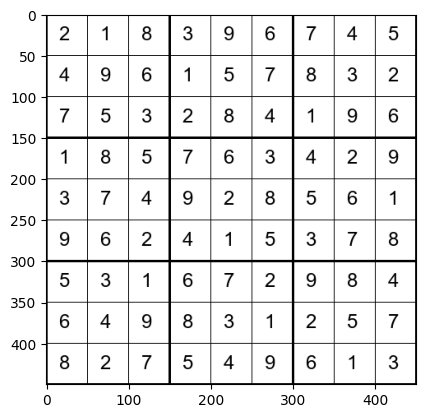

In [24]:
solved_img = cv2.imread("solved_sudoku.png")

plt.figure()
plt.imshow(solved_img)
plt.show()